# SMS SPAM DETECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df=pd.read_csv('spam.csv')
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spam_df.shape

(5572, 5)

In [4]:
spam_df.size
#no of rows X no of cols =>5572 x 5 =>27860  cells are there

27860

In [5]:
spam_df.ndim#2 dimensional array  or we can coclude that Dataframe is always 2 dimensional one

2

In [6]:
a=np.array([[[1,2]],[[2,1]]])
a

array([[[1, 2]],

       [[2, 1]]])

In [7]:
a.shape

(2, 1, 2)

In [8]:
a.size

4

In [9]:
a.ndim#3 dimensional array

3

# PIPELINE FOLLOWED

1. Data cleaning (data preprocessing -> feature engineering..etc)
2. EDA (exploratory data analysis)
3. text preprocessing( discussed in NLP )
4. Model building
5. Evaluauation
6. Improvement
7. website(streamlit,flask,django..etc)
8. Deploy(heruku,aws,gcp,microsoft azure..etc)

# 1. data Cleaning

In [10]:
spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spam_df.columns=['status','message']
spam_df.head()
#spam_df.rename(columns={'v1':'status','v2':'message'},inplace=True)

,status,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
for index,value in enumerate(spam_df['status']):
    if value == 'ham':
        spam_df.loc[index,'status']='not-spam'
    else:
        pass
spam_df.head()

,status,message
0,not-spam,"Go until jurong point, crazy.. Available only ..."
1,not-spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not-spam,U dun say so early hor... U c already then say...
4,not-spam,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#label encode the status feature
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
spam_df['status']=encoder.fit_transform(spam_df['status'])
spam_df.head()
#0 ->not-spam
#1 ->spam

,status,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#check missing value
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   status   5572 non-null   int32 
 1   message  5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [16]:
spam_df.describe()
#learn box plot to know 25,50,75 percentaile,,ie;quantitive analysis

,status
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
spam_df.isnull().sum()
#no any missing value

status     0
message    0
dtype: int64

In [18]:
#check for duplicate value
spam_df.duplicated().sum()
#403 rows are duplicated

403

In [19]:
#remove duplicates
spam_df=spam_df.drop_duplicates(keep='first')
spam_df.duplicated().sum()

0

# 2. EDA

everything below is BIVARIATE ANALYSIS,,,ie;using 2 features 1 plot is drwan.....

In [20]:
#to understand the give data,,,ie;what it is telling us,,we do EDA 
#ie;plot the various graphs and ANALYSE THE DATA WE CAN USE POWER BI like tools..

In [21]:
spam_df['status'].value_counts()
#not-spam -> 4516
#spam -> 653
#dataset is imbalanced

0    4516
1     653
Name: status, dtype: int64

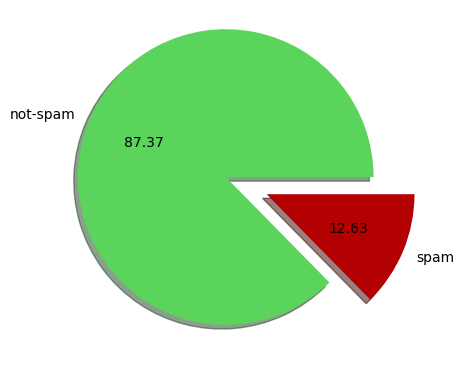

In [22]:
plt.pie(spam_df['status'].value_counts(),labels=['not-spam','spam'],autopct='%0.2f',colors=['#5ad45a','#b30000'],explode=[0.3,0],shadow=True)
plt.show()
#DATASET IS IMBALANCED

In [23]:
#now calculate no of characters,words in each sentence and no of senetences and store it in dataframe
#this can be done by NLTK library
import nltk

In [24]:
spam_df['num_characters']=spam_df['message'].apply(len)
spam_df.head()

,status,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
spam_df.iloc[1,1]
#character means -> alphabet,numeric,special char

'Ok lar... Joking wif u oni...'

In [26]:
# for index,message in enumerate(spam_df['message']):
#     spam_df.loc[index,'num_words']=len(nltk.word_tokenize(message))
# spam_df.head()
spam_df['num_words']=spam_df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
# spam_df['message'].fillna('', inplace=True)


# for i, m in enumerate(spam_df['message']):
#     # Check if the current value is not NaN
#     if isinstance(m, str):
#         spam_df.loc[i, 'num_sentences'] = len(nltk.sent_tokenize(m))
#     else:
#         # Handle NaN values accordingly, for example, assign 0 or any default value
#         spam_df.loc[i, 'num_sentences'] = 0

# spam_df.head()
spam_df['num_sentences']=spam_df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
filter=spam_df['num_sentences'] == 0
spam_df.loc[filter]
#that means each message has atleast 1 sentence 

,status,message,num_characters,num_words,num_sentences


In [29]:
spam_df.head()

,status,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
spam_df[['num_characters','num_words','num_sentences']].describe()
#as u see ,there is a message with atmost num_characters=910,num_words=220,num_senetences=38...

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
sum=0
for val in spam_df['num_characters']:
    sum+=val
print('mean',sum/len(spam_df['num_characters']))

mean 78.92416328109886


In [32]:
print(spam_df['num_characters'].min())
print(spam_df['num_characters'].max())

2
910


In [33]:
max=0
for item in spam_df['num_characters']:
    if item >= max:
        max=item
print(max)

910


In [34]:
filter=spam_df['status'] == 1
spam_df[filter]['num_characters'].max()
#spam_df.loc[filter,'num_characters'].max()
#that means atmost 223 character used in spam message for given dataset

223

In [35]:
spam_df[filter]['num_characters'].mean()
#on an average each spam message comprises of 138 characters,,for this  given dataset

137.47932618683

In [36]:
# spam_df[0,'status']
# gives error bcz spam_df is integer based indexer bydefault,,u have to use spam_df.loc[0,'status']

In [37]:
len(spam_df[spam_df['status']==1] )
#12.67% of 5169

653

In [38]:
len(spam_df[spam_df['status']==0] )
#87.37% of 5169

4516

In [39]:
4516+653

5169

In [40]:
#in our dataset 653 messages are spam and 4516 messages are not spam

In [41]:
#description for not-spam message
spam_df[spam_df['status']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#description for spam message
spam_df[spam_df['status']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


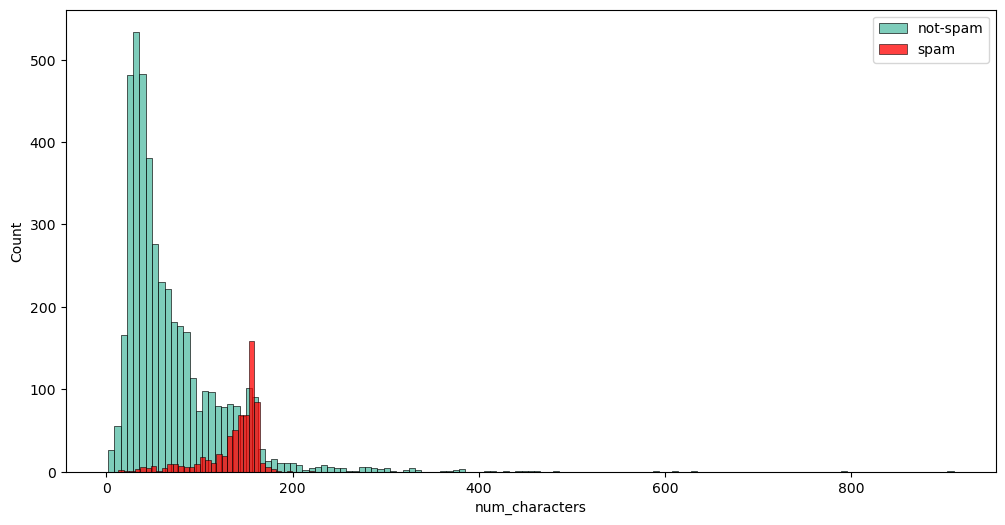

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(spam_df[spam_df['status']==0]['num_characters'],color='#53bda5',label='not-spam')
sns.histplot(spam_df[spam_df['status']==1]['num_characters'],color='red',label='spam')
plt.legend()
plt.show()

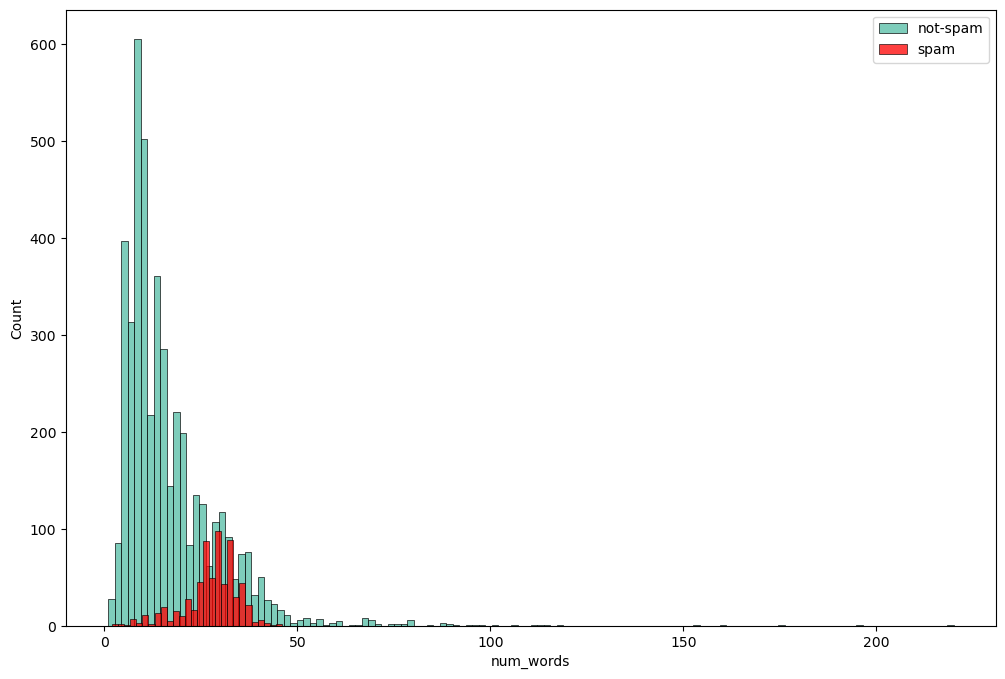

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(spam_df[spam_df['status']==0]['num_words'],color='#53bda5',label='not-spam')
sns.histplot(spam_df[spam_df['status']==1]['num_words'],color='red',label='spam')
plt.legend()
plt.show()

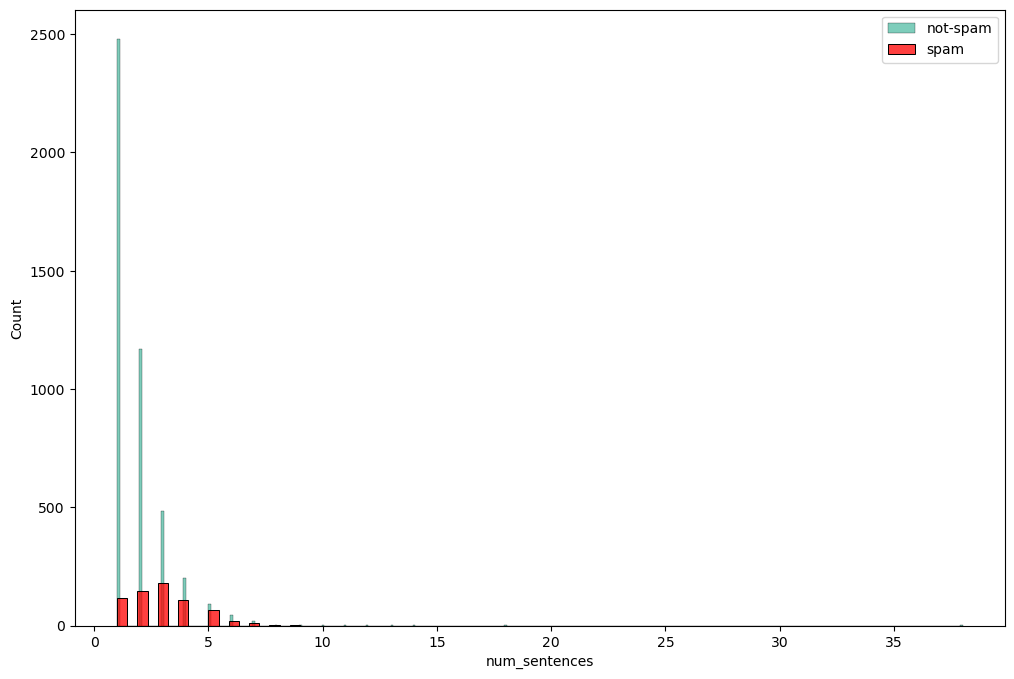

In [45]:
plt.figure(figsize=(12,8))
sns.histplot(spam_df[spam_df['status']==0]['num_sentences'],color='#53bda5',label='not-spam')
sns.histplot(spam_df[spam_df['status']==1]['num_sentences'],color='red',label='spam')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

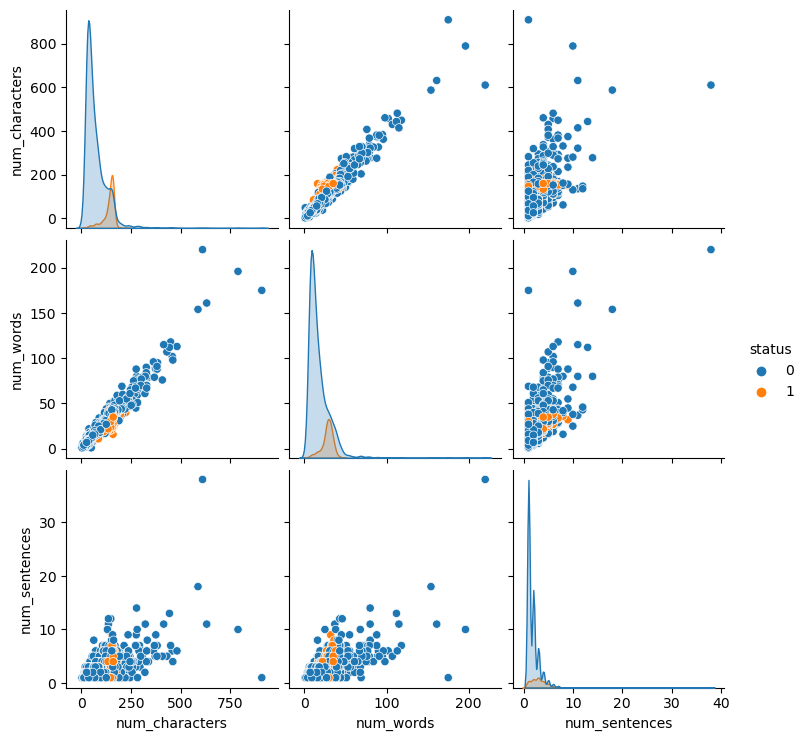

In [46]:
plt.figure(figsize=(12,6))
sns.pairplot(spam_df,hue='status')
plt.show()

In [47]:
# as u see each feature is positive correlated with other features
# ie;linear distribution,,if one increases then other also increases  OR if one decreases then other also decreases

C:\Users\shree\AppData\Local\Temp\ipykernel_9284\781453478.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam_df.corr(),annot=True)


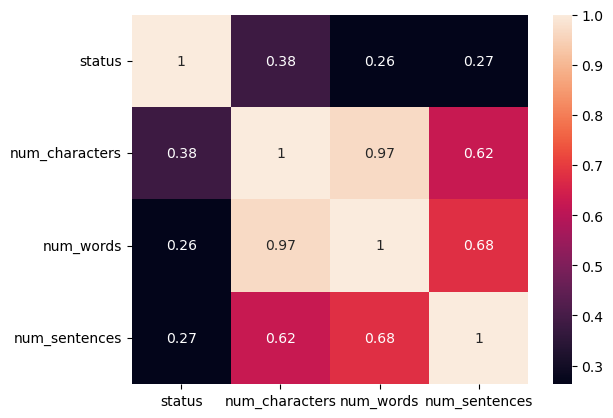

In [48]:
#u can see this correlation with heatmap also
sns.heatmap(spam_df.corr(),annot=True)
plt.show()

In [49]:
spam_df.corr()

C:\Users\shree\AppData\Local\Temp\ipykernel_9284\413433118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spam_df.corr()


,status,num_characters,num_words,num_sentences
status,1.000000,0.382779,0.263086,0.265459
num_characters,0.382779,1.000000,0.966066,0.624236
num_words,0.263086,0.966066,1.000000,0.680021
num_sentences,0.265459,0.624236,0.680021,1.000000


In [50]:
#as u see in our dataset there is a MULTICOLINEARITY,,ie;there exist more than 1 positive correlation
#thus select any one feature among these three while training the model,,,,i selected 'num_characters' bcz it is more correlated with 'status'(0.38) compare to other 2 features
#why we are not selected these three features ,,,?
#bcz if num_characters increases then num_words also increase and thus num_sentences also increases(bcz each features is + corelated with each other so),,thus we can select any one,,but num_characters is more corellated with staus so we consider it while training
#that is there is strong correlation b/n these 3 features ,,so for good training select any one,,bcz that one feature represent the other 2 features
#ie;if 1 feature increses then that means other 2 also increases bcz of positive correlation b/n them

# 3. Data preprocessing

In [51]:
# 1.lowercase
# 2.tokenization
# 3.removing special characters
# 4.removing stop words and punctuation
# 5.stemming

In [52]:
from  nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
#string.punctuation
# '  !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~  '

#ps=PorterStemmer()
#ps.stem('loving') o/p-> love
#ps.stem('dancing') o/p-> danc
#bcz stemmer gives root form of each word thus some root words spelling is diff bcz it is in root,,so we can use lemmatization to get correct spelling which we generally use
#but it doesnt effect the traning,,,,,,thus we use any one  i preffer stemmer,,but lemmatization also work same while trainig
#lemmatization give 'dance'  for i/p 'dancing',,,just for human understanding we use lemmatization,,,
#and bcz lemmatization has this functionality it is slow compare to stemming


# "   ".join(['hello' ,'how', 'are' ,'yu'])
# 'hello   how   are   yu'

In [53]:
def transform_text(text):
    text=text.lower()             #lowercasing
    text=nltk.word_tokenize(text) #tokenizing
    y=[]
    for i in text:
        if i.isalnum():           #removing special character
            y.append(i)
    text=y.copy()  #deep copy,,u can use either y[:] to copy all elements
    y.clear()
    
    for i in text:                #removing stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:       #stemming
        y.append(ps.stem(i))
        
    return " ".join(y)

In [54]:
spam_df['transformed_message']=spam_df['message'].apply(transform_text)
#just for understanding purpose i written the transformed message into transformed_message col,,instead rewritting it in message col itself
#if further we require raw dataset then no need to backtrack again

In [55]:
spam_df.head()

,status,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# thus better way is to use loc and iloc indexer when dealing with DataFrame

In [56]:
# spam_df.loc[0]  this will give first row with all column value
# spam_df[0] this will give error,,,instead use 
#spam_df[['status','message','num_characters','num_words','num_sentences']].loc[0]   give 1st row,,,
#spam_df[['status','message','num_characters','num_words','num_sentences']][0]   gives error

# WordCloud

In [57]:
# which displays/highlights the important or most used word in given dataset/text

In [58]:
spam_df['transformed_message'].str.cat(sep=' ')
#which is our CORPUS,,,,,concatinating the alll rows of i/p text

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 u dun say earli hor u c alreadi say nah think goe usf live around though freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv even brother like speak treat like aid patent per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 gon na home soon want talk stuff anymor tonight k cri enough today six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 search right word thank breath

In [59]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='#e5989b')

In [60]:
#word cloud for spam messages
spam_wc=wc.generate(spam_df[spam_df['status']==1]['transformed_message'].str.cat(sep=''))

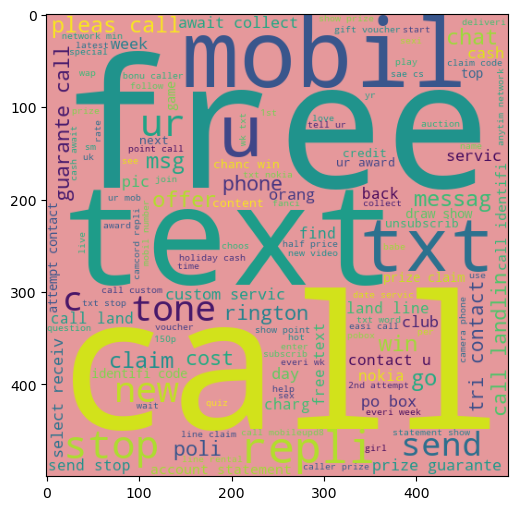

In [61]:
plt.figure(figsize=(6,6))
plt.imshow(spam_wc)

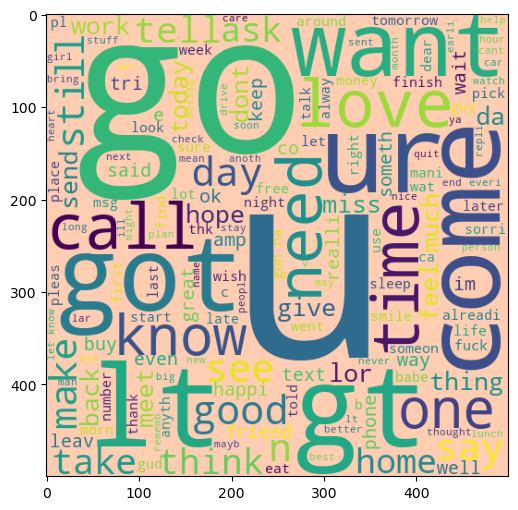

In [62]:
#wordcloud for not-spam messages
wc2=WordCloud(width=500,height=500,min_font_size=10,background_color='#ffcdb2')
not_spam_wc=wc2.generate(spam_df[spam_df['status']== 0]['transformed_message'].str.cat(sep=''))
plt.figure(figsize=(6,6))
plt.imshow(not_spam_wc)

In [63]:
#extract top 30 or 50 words from spam and no_spam message

In [64]:
spam_corpus=[]
for msg in spam_df[spam_df['status']==1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [65]:
len(spam_corpus)
#there are total 9941 words are there in spam message,,,,,note->it is not vocab ie;these are not unique count
#this is spam_corpus contain the repeated words also..

9941

In [66]:
from collections import Counter
dict=Counter(spam_corpus)#returns dictionary
dict
#len(dict) -->2222

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [67]:

i=30
top_30_words_in_spam_message=[]
key_list=list(dict.keys())
val_list=list(dict.values())

while i:
        max=0
        for val in val_list:
            if val > max:
                max=val
        position=val_list.index(max)
        top_30_words_in_spam_message.append(key_list[position])
        i-=1
        val_list.remove(max)
        key_list.remove(key_list[position])
        
print(top_30_words_in_spam_message)     


['call', 'free', '2', 'txt', 'text', 'u', 'ur', 'mobil', 'stop', 'repli', 'claim', '4', 'prize', 'get', 'new', 'servic', 'tone', 'send', 'urgent', 'nokia', 'contact', 'award', 'phone', 'cash', 'pleas', 'week', 'win', 'c', 'collect', 'min']


In [68]:
top_30_word_with_frequency_in_spam_message={}
for word in top_30_words_in_spam_message:
    print(word,dict[word])
    top_30_word_with_frequency_in_spam_message[word]=dict[word]

call 320
free 191
2 155
txt 141
text 122
u 119
ur 119
mobil 114
stop 104
repli 103
claim 98
4 97
prize 82
get 74
new 64
servic 64
tone 63
send 60
urgent 57
nokia 57
contact 56
award 55
phone 52
cash 51
pleas 51
week 49
win 48
c 45
collect 45
min 45


In [69]:
top_30_word_with_frequency_in_spam_message

{'call': 320,
 'free': 191,
 '2': 155,
 'txt': 141,
 'text': 122,
 'u': 119,
 'ur': 119,
 'mobil': 114,
 'stop': 104,
 'repli': 103,
 'claim': 98,
 '4': 97,
 'prize': 82,
 'get': 74,
 'new': 64,
 'servic': 64,
 'tone': 63,
 'send': 60,
 'urgent': 57,
 'nokia': 57,
 'contact': 56,
 'award': 55,
 'phone': 52,
 'cash': 51,
 'pleas': 51,
 'week': 49,
 'win': 48,
 'c': 45,
 'collect': 45,
 'min': 45}

In [70]:
#alternative to get top_30_words
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [71]:
for key,val in top_30_word_with_frequency_in_spam_message.items():
    print(key,val)

call 320
free 191
2 155
txt 141
text 122
u 119
ur 119
mobil 114
stop 104
repli 103
claim 98
4 97
prize 82
get 74
new 64
servic 64
tone 63
send 60
urgent 57
nokia 57
contact 56
award 55
phone 52
cash 51
pleas 51
week 49
win 48
c 45
collect 45
min 45


In [72]:
#as u see we manuaaly coded the correct,,thats why our o/p and counter library o/p is exact same

In [73]:
word_count_df=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count'])
word_count_df

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


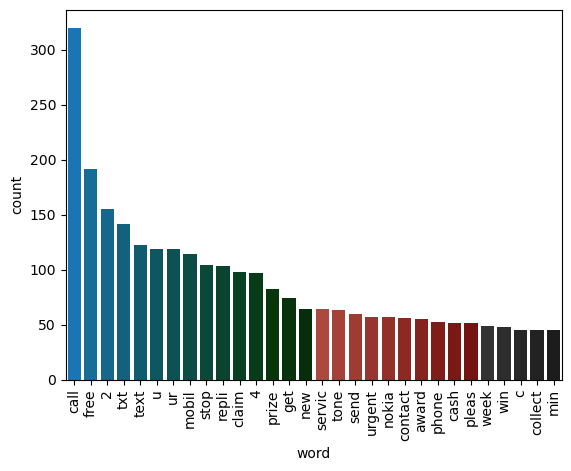

In [74]:
sns.barplot(x=word_count_df['word'],y=word_count_df['count'],palette=[
    "#007acc", "#0076ad", "#00709d", "#006b8e", "#00667e",  # High intensity blue tones
    "#00616f", "#005c5f", "#005750", "#005240", "#004d31",  # Medium intensity blue tones
    "#004822", "#004313", "#003e04", "#003904", "#003405",  # Low intensity green tones
    "#c0392b", "#b63326", "#af2d21", "#a9271c", "#a32117",  # High intensity red tones
    "#9c1b12", "#96150d", "#900f08", "#8a0903", "#840300",  # Medium intensity red tones
    "#333333", "#2d2d2d", "#272727", "#222222", "#1c1c1c"   # Low intensity gray tones
]
)
plt.xticks(rotation='vertical')
plt.show()
#top 30 words in spam_messages,,,,

In [75]:
#try it for not-spam messages

In [76]:
notspam_corpus=[]
for msg in spam_df[spam_df['status']==0]['transformed_message'].tolist():
    for word in msg.split():
        notspam_corpus.append(word)
notspam_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [77]:
Counter(notspam_corpus)
#len(Counter(notspam_corpus)) ->5359

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [78]:
len(notspam_corpus)

35305

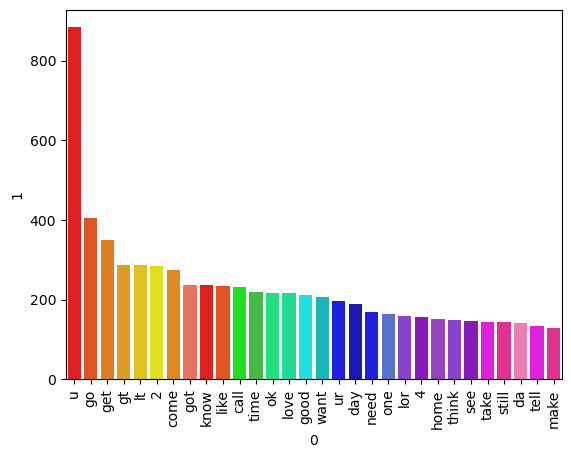

In [79]:
sns.barplot(x=pd.DataFrame(Counter(notspam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(notspam_corpus).most_common(30))[1],
           palette= [
    "#ff0000", "#ff4500", "#ff7f00", "#ffa500", "#ffd700",  # Intense shades of red and orange
    "#ffff00", "#ff8c00", "#ff6347", "#ff0000", "#ff4500",  # Vibrant yellow and orange tones
    "#00ff00", "#32cd32", "#00ff7f", "#00fa9a", "#00ffff",  # High-intensity green and turquoise
    "#00ced1", "#0000ff", "#0000cd", "#0000ff", "#4169e1",  # Bold shades of blue
    "#8a2be2", "#9400d3", "#9932cc", "#8a2be2", "#9400d3",  # Rich and intense purple tones
    "#ff00ff", "#ff1493", "#ff69b4", "#ff00ff", "#ff1493"   # Magenta and deep pink hues
])
plt.xticks(rotation='vertical')
plt.show()

# 4. MODEL BUILDING

In [80]:
#On textual data (classification) Naive bayes will give better results

In [81]:
#i/p feature is 'transformed_message' and o/p feature is 'status'....ie;2d dataset,,,,we taken num characters,words,sentences for data analysing purpose..
#for training purpose we use transformed_message' and 'status'
#first convert text data to vector(numeric form) ,,there are many ways bagofwords,ngrams,tfidf,word2vec,OHE...etc
#we use bag of words for now

In [82]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [83]:
X=cv.fit_transform(spam_df['transformed_message']).toarray()
#representing each word to num(vector) form

In [84]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
for e in X[0]:
    print(e,end=' ')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [86]:
X.shape
#there are 5169 messages are there and each message is represented with vector os size 6677
#ie;in 'transformed_message ' feature there are 6677 unique words are there

(5169, 6677)

In [87]:
corpus=[]
for msg in spam_df['transformed_message'].tolist():
    l=nltk.word_tokenize(msg)
    for i in l:
        corpus.append(i)
corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 

In [88]:
len(Counter(corpus))

6705

In [89]:
len(spam_corpus)

9941

In [90]:
len(notspam_corpus)

35305

In [91]:
len(spam_corpus+notspam_corpus)

45246

In [92]:
len(Counter(spam_corpus+notspam_corpus))

6705

In [93]:
#ie;in 'transformed_message 'there are 6677 unique words are there so...each message is represented with 6677 sized vector

In [94]:
y=spam_df['status'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [95]:
#traning

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [98]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [99]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [100]:
#we want Hight precision model
#bcz dataset is imbalanced ,,accuracy not that much matters(accuracy is missleading in this case),,,
#in this case precision and recall matters ie;type1 and type2 error matters

In [101]:
#theoraticaland practical representation of confusion matrix is complementary but concept is exactly same...
y_actual=[1,0,0,1,1]
y_hat   =[1,1,0,1,0]
print(confusion_matrix(y_actual,y_hat))
temp=pd.DataFrame(confusion_matrix(y_actual,y_hat),columns=[0,1])
temp

#what we learned in theory ,,same concept applied here byt there is minute differnce
#ie;what we learned in theory there confusionmatrix represented with    [[TP,FN]     ->  [(1,1) , (1,0)
#                                                                        [FP,TN]]         (0,1) , (0,0)]

#but practically ie;in inbuilt confusionmatrix  bcz it is code soo everything starts with index 0 ,,so here representation is reverse compare to above representation
#    [[TN,FP]        ->   [(0,0) , (0,1)
#     [FN,TP]]             (1,0) , (1,1)]        (0,0) means ,,actual o/p is 0 and classified(predicted) also as 0  (TN).....
#                                                (0,1) -> actual o/p is 0 and classified(predicted) as 1   (FP)

#in binary classification 0 refers to negative/false and 1 refers to positive/true  bydefaultly..

#w.r.t positive(1) class,,,by defaulty we consider this only,,,but u can consider negative class also,,,interpratability is same only
#precision -->  TP/(TP+FP)
#recall    -->  TP/(TP+FN)

[[1 1]
 [1 2]]


,0,1
0,1,1
1,1,2


# training and calulating the performance of models

In [102]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print('accuracy score:',accuracy_score(y_test,y_pred1))
print('confusion matrix:',confusion_matrix(y_test,y_pred1))
print('precision score:',precision_score(y_test,y_pred1))

#[[775 124]        ->  [[TN,FP]       ->    [(0,0) , (0,1)       0-not_spam,1-spam ,  (actual_val,predicted_val)
# [20 115]]             [FN,TP]]             (1,0) , (1,1)]                              

#total 775+124+115+20 => 1034 rows are there

#thus precision score w.r.t positive(1) class  --> 115/(115+124) => 0.4811

#we need high precision model ie; actually message is notspam but classified as spam this kind of error(type1) should be minimum is our requirment,,,,,assuming our use case(problem)requirment is this..

#as u see precision score is very less,,,generally we want precision score above 95% for good high precision model

accuracy score: 0.8607350096711799
confusion matrix: [[775 124]
 [ 20 115]]
precision score: 0.4811715481171548


In [103]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('accuracy score:',accuracy_score(y_test,y_pred2))
print('confusion matrix:',confusion_matrix(y_test,y_pred2))
print('precision score:',precision_score(y_test,y_pred2))
#as u see multinomial model performing better than GaussianNB

accuracy score: 0.9680851063829787
confusion matrix: [[878  21]
 [ 12 123]]
precision score: 0.8541666666666666


In [104]:
bnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
print('accuracy score:',accuracy_score(y_test,y_pred3))
print('confusion matrix:',confusion_matrix(y_test,y_pred3))
print('precision score:',precision_score(y_test,y_pred3))

accuracy score: 0.9680851063829787
confusion matrix: [[878  21]
 [ 12 123]]
precision score: 0.8541666666666666


In [105]:
#as u see bernoulli and multinomial model has high precision score compare to Gaussian NB
#or we can say bnb and mnb meeting our usecase reqirment ie;doing less type1 error 

In [106]:
#instead Bagofwords i will use tfidf vectorization technique

In [107]:
X=tfidf.fit_transform(spam_df['transformed_message']).toarray()

In [108]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [110]:
X.shape

(5169, 6677)

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [112]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [113]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print('accuracy score:',accuracy_score(y_test,y_pred1))
print('confusion matrix:',confusion_matrix(y_test,y_pred1))
print('precision score:',precision_score(y_test,y_pred1))

accuracy score: 0.8597678916827853
confusion matrix: [[777 122]
 [ 23 112]]
precision score: 0.47863247863247865


In [114]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('accuracy score:',accuracy_score(y_test,y_pred2))
print('confusion matrix:',confusion_matrix(y_test,y_pred2))
print('precision score:',precision_score(y_test,y_pred2))
#as u see precision score of this moddel is 100%  and it exactly meets out usecase requirment....

accuracy score: 0.9526112185686654
confusion matrix: [[899   0]
 [ 49  86]]
precision score: 1.0


In [115]:
bnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
print('accuracy score:',accuracy_score(y_test,y_pred3))
print('confusion matrix:',confusion_matrix(y_test,y_pred3))
print('precision score:',precision_score(y_test,y_pred3))
#as u see bnb and mnb performing near by same and both meets our requirment
#ie;precision score is high (type1 error should be minimum as much as possible)

accuracy score: 0.9526112185686654
confusion matrix: [[899   0]
 [ 49  86]]
precision score: 1.0


In [116]:
#bcz in our usecase requirment accuracy is not reliable measure ,,so we can choose any one from bnb and mnb ,,bcz precision score is 100%
#ie;type1 error is 0%

# just for practice purpose try the all supervised learning Classification models.....

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [118]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [119]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [120]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [121]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9661508704061895, 0.9545454545454546)

In [122]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9661508704061895
Precision -  0.9545454545454546
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9526112185686654
Precision -  1.0
For  DT
Accuracy -  0.9168278529980658
Precision -  0.788235294117647
For  LR
Accuracy -  0.9400386847195358
Precision -  0.8842105263157894
For  RF
Accuracy -  0.965183752417795
Precision -  1.0
For  AdaBoost
Accuracy -  0.9555125725338491
Precision -  0.9238095238095239
For  BgC
Accuracy -  0.9477756286266924
Precision -  0.8461538461538461
For  ETC
Accuracy -  0.9709864603481625
Precision -  1.0
For  GBDT
Accuracy -  0.9332688588007737
Precision -  0.8666666666666667
For  xgb
Accuracy -  0.9555125725338491
Precision -  0.9009009009009009


In [123]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [124]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.952611
2,RF,Accuracy,0.965184
3,ETC,Accuracy,0.970986
4,SVC,Accuracy,0.966151
5,AdaBoost,Accuracy,0.955513
6,xgb,Accuracy,0.955513
7,LR,Accuracy,0.940039
8,GBDT,Accuracy,0.933269
9,BgC,Accuracy,0.947776


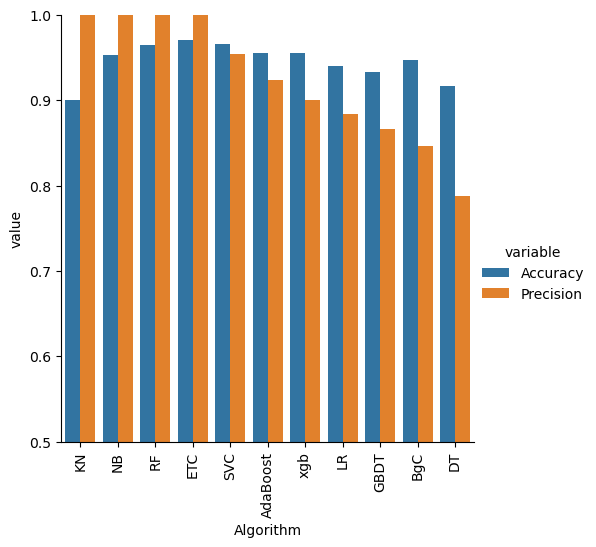

In [125]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
#KN , NB , RF , ETC  has precision score = 100%
#but ETC is best bcz its accuracy also good compare to other 3 model

# Model Improve

In [127]:
#change the max_features parameter  of tfidf...
#if max_features=1000 ,,that means consider only top 1000 most occured word from spam_df['transformed_message'],,for vectorizatin
#max_features is hyperparameter  ,u have to consider most deserving value so u can use GridSearchCV ,RandomizedsearchCV for choosing this value
#but i randomly used 3000 bcz it is giving good results

In [128]:
tfidf2=TfidfVectorizer(max_features=3000)

In [129]:
X=tfidf2.fit_transform(spam_df['transformed_message']).toarray()

In [130]:
X.shape
#as u see there are 5169 rows(messages) are there and each represented with vector of dimension 3000

(5169, 3000)

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [136]:
svc2 = SVC(kernel='sigmoid', gamma=1.0)
knc2 = KNeighborsClassifier()
mnb2 = MultinomialNB()
dtc2 = DecisionTreeClassifier(max_depth=5)
lrc2 = LogisticRegression(solver='liblinear', penalty='l1')
rfc2 = RandomForestClassifier(n_estimators=50, random_state=2)
abc2 = AdaBoostClassifier(n_estimators=50, random_state=2)
bc2 = BaggingClassifier(n_estimators=50, random_state=2)
etc2 = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt2 = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb2 = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
clfs = {
    'SVC' : svc2,
    'KN' : knc2, 
    'NB': mnb2, 
    'DT': dtc2, 
    'LR': lrc2, 
    'RF': rfc2, 
    'AdaBoost': abc2, 
    'BgC': bc2, 
    'ETC': etc2,
    'GBDT':gbdt2,
    'xgb':xgb2
}

In [138]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.956140350877193
For  KN
Accuracy -  0.9148936170212766
Precision -  1.0
For  NB
Accuracy -  0.9613152804642167
Precision -  1.0
For  DT
Accuracy -  0.913926499032882
Precision -  0.7613636363636364
For  LR
Accuracy -  0.9410058027079303
Precision -  0.8854166666666666
For  RF
Accuracy -  0.9661508704061895
Precision -  1.0
For  AdaBoost
Accuracy -  0.9574468085106383
Precision -  0.9174311926605505
For  BgC
Accuracy -  0.9448742746615088
Precision -  0.8362068965517241
For  ETC
Accuracy -  0.9709864603481625
Precision -  0.9646017699115044
For  GBDT
Accuracy -  0.9400386847195358
Precision -  0.9195402298850575
For  xgb
Accuracy -  0.9545454545454546
Precision -  0.9074074074074074


In [139]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_feature_3000':accuracy_scores,'Precision_max_feature_3000':precision_scores}).sort_values('Precision_max_feature_3000',ascending=False)


In [146]:
temp_df1 = pd.melt(temp_df, id_vars = "Algorithm")
temp_df1

,Algorithm,variable,value
0,KN,Accuracy_max_feature_3000,0.914894
1,NB,Accuracy_max_feature_3000,0.961315
2,RF,Accuracy_max_feature_3000,0.966151
3,ETC,Accuracy_max_feature_3000,0.970986
4,SVC,Accuracy_max_feature_3000,0.970019
5,GBDT,Accuracy_max_feature_3000,0.940039
6,AdaBoost,Accuracy_max_feature_3000,0.957447
7,xgb,Accuracy_max_feature_3000,0.954545
8,LR,Accuracy_max_feature_3000,0.941006
9,BgC,Accuracy_max_feature_3000,0.944874


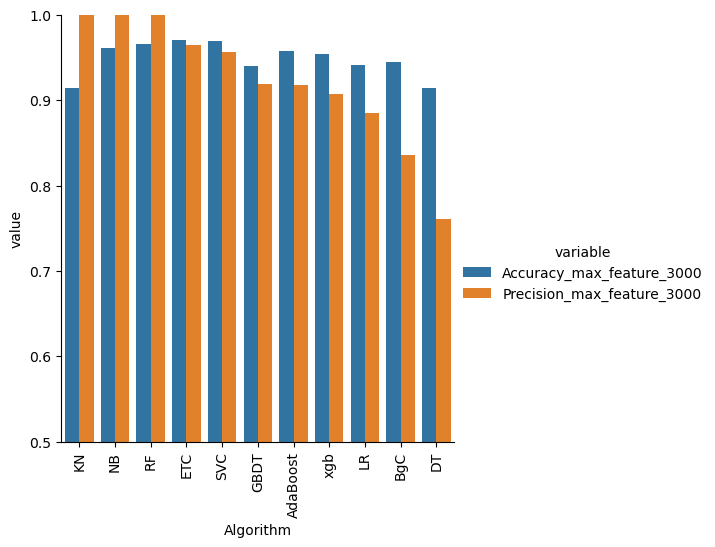

In [148]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=temp_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [149]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_feature_3000,Precision_max_feature_3000
0,KN,0.900387,1.000000,0.914894,1.000000
1,NB,0.952611,1.000000,0.961315,1.000000
2,RF,0.965184,1.000000,0.966151,1.000000
3,ETC,0.970986,1.000000,0.970986,0.964602
4,SVC,0.966151,0.954545,0.970019,0.956140
5,AdaBoost,0.955513,0.923810,0.957447,0.917431
6,xgb,0.955513,0.900901,0.954545,0.907407
7,LR,0.940039,0.884211,0.941006,0.885417
8,GBDT,0.933269,0.866667,0.940039,0.919540
9,BgC,0.947776,0.846154,0.944874,0.836207


In [142]:
#try above all procedure by doing scaling on X...do MinMax scaler bcz it scale the feature in range 0 to 1,,
#and it is act as probability for NB....
#but if u do StandardScaler  then it sclae down the features in -1 to 1 range ,,thus NB will not work properly(bcz it is probability
#based model and probability ranges b/n 0 to 1 so..)
#u can do it further ,,bcz now i want to add this in by resume and i dont have time so..

In [150]:
#w/o doing max_features ,,,our models are perofroming best so consider them for further stages
#NB,RF,ETC is best one's

# voting classifier on best perofrming model(NB,RF,ETC) w/o setting  max_features parameter

In [151]:

# A voting classifier in machine learning is an ensemble learning method that combines the predictions from multiple individual classifiers to make a final prediction. The idea is to leverage the strengths of different classifiers and improve overall performance.

# There are two main types of voting classifiers:

# 1)Hard Voting Classifier:

# In a hard voting classifier, each individual classifier in the ensemble "votes" for a class, and the class that receives the majority of the votes is chosen as the final prediction.
# This approach works well when the individual classifiers have similar performances.

# 2)Soft Voting Classifier:

# In a soft voting classifier, instead of just counting the votes, the classifiers assign a probability to each class. The final prediction is based on the class with the highest average probability.
# This approach is useful when the individual classifiers can estimate class probabilities (e.g., classifiers that use probability-based models like logistic regression).

In [152]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

In [153]:
from sklearn.ensemble import VotingClassifier

In [155]:
voting = VotingClassifier(estimators=[('rfc',rfc),('nb',mnb),('etc',etc)],voting='soft')

In [158]:
tfidf3=TfidfVectorizer()#not considering max_feature=3000,,,bcz w.o this our models perfroming very good
X=tfidf3.fit_transform(spam_df['transformed_message']).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [160]:
#training

In [159]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [161]:
#testing

In [163]:
y_pred=voting.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("precision Accuracy:",precision_score(y_test,y_pred))

Accuracy: 0.9622823984526112
precision Accuracy: 1.0


In [164]:
#u can consider only ETC model,,bcz its accuracy is 97% and precision is 100%,,so ...deploy the ETC model...

In [165]:
#u can perform hyperparameter tuning and all stuffs to improve the model...but i dont have time now so i consider ETC model for deployment

In [166]:
#u can also try stacking model also,,,and check how it is performing

# stackingclassifier

In [167]:
#stacking is also same as votingclassifier,,,in votingclassifier every models prediction is take in account to produce finel prediction/output
#but in stacking we can give weightage to model,,so that final o/p is more biased towards that model
#ie;we set finalestimator parameter with any one of the model which is alone performing good,,,in our case ETC is alone performing good,,so we can give it as final estimator
#so that prediction is more biased towards this model

In [170]:
estimators=[('rfc',rfc),('nb',mnb),('etc',etc)]
final_estimator=ExtraTreesClassifier(n_estimators=50, random_state=2)

In [171]:
from sklearn.ensemble import StackingClassifier

In [172]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [173]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("precision Accuracy:",precision_score(y_test,y_pred))
#see consider the ETC model alone......

Accuracy: 0.9671179883945842
precision Accuracy: 0.8581560283687943


In [183]:
#best performing till now is a ETC model alone so consider this only

In [175]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)#u can do hyperparameter tuning to select best set of parameters for this etc classifier
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("precision Accuracy:",precision_score(y_test,y_pred))
#as u this is best model we get till now,,,,u can do hyperparameter tuning to select best set of parameters for this etc classifier...

Accuracy: 0.9709864603481625
precision Accuracy: 1.0


In [174]:
X.shape# as u see we are not set max_features=3000

(5169, 6677)

# save this model using pickle or serialization..

In [182]:
import pickle

In [184]:
pickle.dump(tfidf3,open('vectorizer.pkl','wb'))#saved the tfidf3 object which is w/o max_feature=3000 parameter,,bcz on this vectorization method our model perfroming good compare to tfidf with max_features=3000
pickle.dump(etc,open('model.pkl','wb'))#saved the learn parameters in model.pkl file in cwd
pickle.dump(transform_text,open('preprocess.pkl','wb'))

# now u can use straemlit or flask or html,css,django create a web site load these objects into it and deploy it on aws or gcp or azure or heroku   by using CI/CD pipeline and Dockers

# how pickle works see

In [176]:
def transform_text(text):
    text=text.lower()             #lowercasing
    text=nltk.word_tokenize(text) #tokenizing
    y=[]
    for i in text:
        if i.isalnum():           #removing special character
            y.append(i)
    text=y.copy()  #deep copy,,u can use either y[:] to copy all elements
    y.clear()
    
    for i in text:                #removing stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:       #stemming
        y.append(ps.stem(i))
        
    return " ".join(y)

In [177]:
transform_text('shree hi how are u bro')

'shree hi u bro'

In [178]:
import pickle
pickle.dump(transform_text,open('preprocess.pkl','wb'))

In [180]:
s=pickle.load(open('preprocess.pkl','rb'))

In [181]:
s('shree hi how are u bro')

'shree hi u bro'

In [186]:
d={'a':1,'b':2,'c':3}
d

{'a': 1, 'b': 2, 'c': 3}

In [190]:
byte_stream_obj_of_d=pickle.dump(d,open('dictionary_ds.pkl','wb'))
byte_stream_obj_of_d#not printable

In [191]:
pickle.load(open('dictionary_ds.pkl','rb'))

{'a': 1, 'b': 2, 'c': 3}

In [192]:
#or
saved_d=pickle.load(open('dictionary_ds.pkl','rb'))
saved_d

{'a': 1, 'b': 2, 'c': 3}